# Data loading and preprocessing

This file containst the code for preparing, exploring MEG-data from the [Human connectome dataset](https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf), and training and evaluating different models on a subset of the data provided in the context of "Pattern Recognition and Deep Learning" taught by Siamak Mehrkanoon. Check out their [Repository](https://github.com/SMehrkanoon/Deep-brain-state-classification-of-MEG-data) for a state of the art model and the underlying data.

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import h5py
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import re


In [3]:
#Inspecting a sample
def plotframe(array, title=""):
    df_cm = pd.DataFrame(array, range(len(array)), range(len(array[0])))
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=False, cmap="PuRd", annot_kws={"size": 16}) # font size
    plt.title(title)
    plt.show()

def get_dataset_name(file_path):
    file_name = file_path.split('/')[-1]
    temp = file_name.split('_')[:-1]
    dataset_name = "_".join(temp)
    return dataset_name

def get_dataset_name_denoise(file_path):
    file_name = file_path.split('/')[-1]
    temp = file_name.split('_')[1:-1]
    
    print(temp)
    dataset_name = "_".join(temp)
    return dataset_name

In [4]:
from meegkit import star
from meegkit.utils import demean, normcol

scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)
def denoise(matrix):
    #Takes a matrix and applies denoising to it using the STAR method.
    transposed_matrix = np.transpose(matrix)
    y, _, _ = star.star(transposed_matrix, thresh=2.2) #As the method learns to increase the threshold, it will remove more and more noise.
    denoised_matrix = np.transpose(y)
    return denoised_matrix

def loadFile_no_transform(file_path):
    with h5py.File(file_path, 'r') as f:
        dataset_name = get_dataset_name_denoise(file_path)
        matrix = f.get('data')[()]
        #scaled_data = scaler.fit_transform(matrix)
        # Print information about the scaled data
        print(f"File: {file_path}")
        #print(f"Scaled data type: {type(scaled_data)}")
        #print(f"Scaled data shape: {scaled_data.shape}")
        return matrix


def loadFile(file_path):
    with h5py.File(file_path, 'r') as f:
        dataset_name = get_dataset_name(file_path)
        matrix = f.get(dataset_name)[()]
        matrix = denoise(matrix)
        scaled_data = scaler.fit_transform(matrix)
        # Print information about the scaled data
        print(f"File: {file_path}")
        #print(f"Scaled data type: {type(scaled_data)}")
        #print(f"Scaled data shape: {scaled_data.shape}")
        return scaled_data



In [6]:
#Original Implementation here: https://github.com/SMehrkanoon/Deep-brain-state-classification-of-MEG-data/blob/c2f848bbf83ce76b4820ec56028b3571b09b7111/AA-CascadeNet_AA-MultiviewNet/data_utils.py#L732
def array_to_mesh(arr):    

    input_rows = 20
    input_columns = 21
    input_channels = 248
    print(arr.shape)
    assert arr.shape == (1,input_channels),"the shape of the input array should be (1,248) because there are 248 MEG channels,received array of shape " + str(arr.shape)
    output = np.zeros((input_rows,input_columns),dtype = float)
    
    #121
    output[0][10] = arr[0][120]
      
    #89
    output[1][12] = arr[0][151]
    output[1][11] = arr[0][119]
    output[1][10] = arr[0][88]
    output[1][9] = arr[0][89]
    output[1][8] = arr[0][121]
    
    #61
    output[2][13] = arr[0][150]
    output[2][12] = arr[0][118]
    output[2][11] = arr[0][87]
    output[2][10] = arr[0][60]
    output[2][9] = arr[0][61]
    output[2][8] = arr[0][90]
    output[2][7] = arr[0][122]
    
    #37
    output[3][14] = arr[0][149]
    output[3][13] = arr[0][117]
    output[3][12] = arr[0][86]
    output[3][11] = arr[0][59]
    output[3][10] = arr[0][36]
    output[3][9] = arr[0][37]
    output[3][8] = arr[0][62]
    output[3][7] = arr[0][91]
    output[3][6] = arr[0][123]
    
    #19
    output[4][17] = arr[0][194]
    output[4][16] = arr[0][175]
    output[4][15] = arr[0][148]
    output[4][14] = arr[0][116]
    output[4][13] = arr[0][85]
    output[4][12] = arr[0][58]
    output[4][11] = arr[0][35]
    output[4][10] = arr[0][18]
    output[4][9] = arr[0][19]
    output[4][8] = arr[0][38]
    output[4][7] = arr[0][63]
    output[4][6] = arr[0][92]
    output[4][5] = arr[0][152]
    output[4][4] = arr[0][176]

    #5
    output[5][20] = arr[0][247]
    output[5][19] = arr[0][227]
    output[5][18] = arr[0][193]
    output[5][17] = arr[0][174]
    output[5][16] = arr[0][147]
    output[5][15] = arr[0][115]
    output[5][14] = arr[0][84]
    output[5][13] = arr[0][57]
    output[5][12] = arr[0][34]
    output[5][11] = arr[0][17]
    output[5][10] = arr[0][4]
    output[5][9] = arr[0][5]
    output[5][8] = arr[0][20]
    output[5][7] = arr[0][39]
    output[5][6] = arr[0][64]
    output[5][5] = arr[0][93]
    output[5][4] = arr[0][125]
    output[5][3] = arr[0][153]
    output[5][2] = arr[0][177]
    output[5][1] = arr[0][211]
    output[5][0] = arr[0][228]
    
    #4
    output[6][20] = arr[0][246]
    output[6][19] = arr[0][226]
    output[6][18] = arr[0][192]
    output[6][17] = arr[0][173]
    output[6][16] = arr[0][146]
    output[6][15] = arr[0][114]
    output[6][14] = arr[0][83]
    output[6][13] = arr[0][56]
    output[6][12] = arr[0][33]
    output[6][11] = arr[0][16]
    output[6][10] = arr[0][3]
    output[6][9] = arr[0][6]
    output[6][8] = arr[0][21]
    output[6][7] = arr[0][40]
    output[6][6] = arr[0][65]
    output[6][5] = arr[0][94]
    output[6][4] = arr[0][126]
    output[6][3] = arr[0][154]
    output[6][2] = arr[0][178]
    output[6][1] = arr[0][212]
    output[6][0] = arr[0][229]

    
    #3
    output[7][19] = arr[0][245]
    output[7][18] = arr[0][210]
    output[7][17] = arr[0][172]
    output[7][16] = arr[0][145]
    output[7][15] = arr[0][113]
    output[7][14] = arr[0][82]
    output[7][13] = arr[0][55]
    output[7][12] = arr[0][32]
    output[7][11] = arr[0][15]
    output[7][10] = arr[0][2]
    output[7][9] = arr[0][7]
    output[7][8] = arr[0][22]
    output[7][7] = arr[0][41]
    output[7][6] = arr[0][66]
    output[7][5] = arr[0][95]
    output[7][4] = arr[0][127]
    output[7][3] = arr[0][155]
    output[7][2] = arr[0][195]
    output[7][1] = arr[0][230]
            
    #8
    output[8][19] = arr[0][244]
    output[8][18] = arr[0][209]
    output[8][17] = arr[0][171]
    output[8][16] = arr[0][144]
    output[8][15] = arr[0][112]
    output[8][14] = arr[0][81]
    output[8][13] = arr[0][54]
    output[8][12] = arr[0][31]
    output[8][11] = arr[0][14]
    output[8][10] = arr[0][1]
    output[8][9] = arr[0][8]
    output[8][8] = arr[0][23]
    output[8][7] = arr[0][42]
    output[8][6] = arr[0][67]
    output[8][5] = arr[0][96]
    output[8][4] = arr[0][128]
    output[8][3] = arr[0][156]
    output[8][2] = arr[0][196]
    output[8][1] = arr[0][231]
    
    #1
    output[9][19] = arr[0][243]
    output[9][18] = arr[0][208]
    output[9][17] = arr[0][170]
    output[9][16] = arr[0][143]
    output[9][15] = arr[0][111]
    output[9][14] = arr[0][80]
    output[9][13] = arr[0][53]
    output[9][12] = arr[0][30]
    output[9][11] = arr[0][13]
    output[9][10] = arr[0][0]
    output[9][9] = arr[0][9]
    output[9][8] = arr[0][24]
    output[9][7] = arr[0][43]
    output[9][6] = arr[0][68]
    output[9][5] = arr[0][97]
    output[9][4] = arr[0][129]
    output[9][3] = arr[0][157]
    output[9][2] = arr[0][197]
    output[9][1] = arr[0][232]
    
    #12
    output[10][18] = arr[0][225]
    output[10][17] = arr[0][191]
    output[10][16] = arr[0][142]
    output[10][15] = arr[0][110]
    output[10][14] = arr[0][79]
    output[10][13] = arr[0][52]
    output[10][12] = arr[0][29]
    output[10][11] = arr[0][12]
    output[10][10] = arr[0][11]
    output[10][9] = arr[0][10]
    output[10][8] = arr[0][25]
    output[10][7] = arr[0][44]
    output[10][6] = arr[0][69]
    output[10][5] = arr[0][98]
    output[10][4] = arr[0][130]
    output[10][3] = arr[0][179]
    output[10][2] = arr[0][213]
    
    #28
    output[11][16] = arr[0][169]
    output[11][15] = arr[0][141]
    output[11][14] = arr[0][109]
    output[11][13] = arr[0][78]
    output[11][12] = arr[0][51]
    output[11][11] = arr[0][28]
    output[11][10] = arr[0][27]
    output[11][9] = arr[0][26]
    output[11][8] = arr[0][45]
    output[11][7] = arr[0][70]
    output[11][6] = arr[0][99]
    output[11][5] = arr[0][131]
    output[11][4] = arr[0][158]
    
    #49
    output[12][17] = arr[0][190]
    output[12][16] = arr[0][168]
    output[12][15] = arr[0][140]
    output[12][14] = arr[0][108]
    output[12][13] = arr[0][77]
    output[12][12] = arr[0][50]
    output[12][11] = arr[0][49]
    output[12][10] = arr[0][48]
    output[12][9] = arr[0][47]
    output[12][8] = arr[0][46]
    output[12][7] = arr[0][71]
    output[12][6] = arr[0][100]
    output[12][5] = arr[0][132]
    output[12][4] = arr[0][159]
    output[12][3] = arr[0][180]

    
    #75
    output[13][18] = arr[0][224]
    output[13][17] = arr[0][207]
    output[13][16] = arr[0][189]
    output[13][15] = arr[0][167]
    output[13][14] = arr[0][139]
    output[13][13] = arr[0][107]
    output[13][12] = arr[0][76]
    output[13][11] = arr[0][75]
    output[13][10] = arr[0][74]
    output[13][9] = arr[0][73]
    output[13][8] = arr[0][72]
    output[13][7] = arr[0][101]
    output[13][6] = arr[0][133]
    output[13][5] = arr[0][160]
    output[13][4] = arr[0][181]
    output[13][3] = arr[0][198]
    output[13][2] = arr[0][214]
    
    #105
    output[14][18] = arr[0][242]
    output[14][17] = arr[0][223]
    output[14][16] = arr[0][206]
    output[14][15] = arr[0][188]
    output[14][14] = arr[0][166]
    output[14][13] = arr[0][138]
    output[14][12] = arr[0][106]
    output[14][11] = arr[0][105]
    output[14][10] = arr[0][104]
    output[14][9] = arr[0][103]
    output[14][8] = arr[0][102]
    output[14][7] = arr[0][134]
    output[14][6] = arr[0][161]
    output[14][5] = arr[0][182]
    output[14][4] = arr[0][199]
    output[14][3] = arr[0][215]
    output[14][2] = arr[0][233]
    
    
    #137
    output[15][16] = arr[0][241]
    output[15][15] = arr[0][222]
    output[15][14] = arr[0][205]
    output[15][13] = arr[0][187]
    output[15][12] = arr[0][165]
    output[15][11] = arr[0][137]
    output[15][10] = arr[0][136]
    output[15][9] = arr[0][135]
    output[15][8] = arr[0][162]
    output[15][7] = arr[0][183]
    output[15][6] = arr[0][200]
    output[15][5] = arr[0][216]
    output[15][4] = arr[0][234]
    
    
    #mix
    output[16][15] = arr[0][240]
    output[16][14] = arr[0][221]
    output[16][13] = arr[0][204]
    output[16][12] = arr[0][186]
    output[16][11] = arr[0][164]
    output[16][10] = arr[0][163]
    output[16][9] = arr[0][184]
    output[16][8] = arr[0][201]
    output[16][7] = arr[0][217]
    output[16][6] = arr[0][235]
   
    #186
    output[17][12] = arr[0][220]
    output[17][11] = arr[0][203]
    output[17][10] = arr[0][185]
    output[17][9] = arr[0][202]
    output[17][8] = arr[0][218]
   
    #220
    output[18][11] = arr[0][239]
    output[18][10] = arr[0][219]
    output[18][9] = arr[0][236]
    
    #mix
    output[19][11] = arr[0][238]
    output[19][10] = arr[0][237]
    
    return output


# Creation of NPY (raw 248xtime -> mesh 20x21xtime)

In [8]:
def calculate_averages(matrix, n):
    num_averages = matrix.shape[1] // n
    averages = []
    for i in range(num_averages):
        start = i * n
        end = start + n
        avg = np.average(matrix[:, start:end], axis=1)
        averages.append(avg)
    return averages

def loadDataset(dataset_type, task_type, split_type='train'):
    base_directory = f"./Final Project data/{dataset_type}/{split_type}/"
    output_directory = f"./Final Project data/{dataset_type}_mesh/{split_type}/"

    for filename in os.listdir(base_directory):
        if filename.startswith(f"denoise_{task_type}") and filename.endswith(".h5"):
            # Extract subject number and chunk number from filename
            match = re.match(r"denoise_(\w+)_([0-9]+)_([0-9]+)\.h5", filename)
            if match: 
                task, subject_number, chunk_number = match.groups()

                # Construct the file path
                file_path = os.path.join(base_directory, filename)
                matrix = loadFile_no_transform(file_path)

                # Calculate averages of each 50 steps
                averages = calculate_averages(matrix, 10)

                # Save each average to the output directory
                all_meshes = []
                for i, avg in enumerate(averages):
                    meshDisplay = array_to_mesh(avg[np.newaxis, :])
                    all_meshes.append(meshDisplay)

                # Save all meshes to a separate file
                np.save(os.path.join(output_directory, f"denoise_{task_type}_{subject_number}_{chunk_number}_meshes.npy"), all_meshes)

'''
dataset_types = ['Intra', 'Cross']
task_types = ['rest', 'task_motor', 'task_story_math', 'task_working_memory']
split_types = ['train', 'test', 'test1', 'test2', 'test3']

for dataset_type in dataset_types:
    for task_type in task_types:
        if dataset_type == 'Intra':
            loadDataset(dataset_type, task_type, split_type='train')
            loadDataset(dataset_type, task_type, split_type='test')
        if dataset_type == 'Cross':
            loadDataset(dataset_type, task_type, split_type='train')
            loadDataset(dataset_type, task_type, split_type='test1')
            loadDataset(dataset_type, task_type, split_type='test2')
            loadDataset(dataset_type, task_type, split_type='test3')
'''


"\ndataset_types = ['Intra', 'Cross']\ntask_types = ['rest', 'task_motor', 'task_story_math', 'task_working_memory']\nsplit_types = ['train', 'test', 'test1', 'test2', 'test3']\n\nfor dataset_type in dataset_types:\n    for task_type in task_types:\n        if dataset_type == 'Intra':\n            loadDataset(dataset_type, task_type, split_type='train')\n            loadDataset(dataset_type, task_type, split_type='test')\n        if dataset_type == 'Cross':\n            loadDataset(dataset_type, task_type, split_type='train')\n            loadDataset(dataset_type, task_type, split_type='test1')\n            loadDataset(dataset_type, task_type, split_type='test2')\n            loadDataset(dataset_type, task_type, split_type='test3')\n"

In [9]:
import numpy as np

# Load the data
data = np.load("./Final Project data/Intra_mesh/train/denoise_task_story_math_105923_3_meshes.npy")

# Print the shape of the data
print("Shape of the data:", data.shape)

# Print the maximum and minimum values in the data
print("Max value in the data:", np.max(data))
print("Min value in the data:", np.min(data))

# Print the first few items in the data to inspect them
print("First few items in the data:", data[:5])

Shape of the data: (3562, 20, 21)
Max value in the data: 1.0
Min value in the data: 0.0
First few items in the data: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


# Train Val Test loaders

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import os
import re

# Define a custom dataset
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Load the data and labels
data = []
labels = []
task_types = ['rest', 'task_motor', 'task_story_math', 'task_working_memory']
for task_type in task_types:
    base_directory = f"./Final Project data/Intra_mesh/train/"
    for filename in os.listdir(base_directory):
        if filename.startswith(f"denoise_{task_type}") and filename.endswith("_meshes.npy"):
            # Load the data
            task_data = np.load(os.path.join(base_directory, filename))
            task_data = np.expand_dims(task_data, axis=1)  # Add channel dimension
            # Create labels
            task_labels = np.full(task_data.shape[0], task_types.index(task_type))
            print(f"Task type: {task_type}, Labels: {task_labels}")  # Print task type and labels
            data.append(task_data)
            labels.append(task_labels)

# Concatenate data and labels
data = np.concatenate(data)
labels = np.concatenate(labels)
print(f"Data shape: {data.shape}, Labels shape: {labels.shape}, Unique labels: {np.unique(labels)}")

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f"Train data shape: {train_data.shape}, Train labels shape: {train_labels.shape}, Unique train labels: {np.unique(train_labels)}")
print(f"Val data shape: {val_data.shape}, Val labels shape: {val_labels.shape}, Unique val labels: {np.unique(val_labels)}")

# Create dataloaders
batch_size = 256
train_dataloader = DataLoader(MyDataset(train_data, train_labels), batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(MyDataset(val_data, val_labels), batch_size=batch_size, shuffle=True)

# Print the number of occurrences of each label in train_labels and val_labels
print(f"Number of each label in train_labels: {np.bincount(train_labels)}")
print(f"Number of each label in val_labels: {np.bincount(val_labels)}")

Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_story_math, Labels: [2 2 2 ... 2 2 2]
Task type: task_story_math, Labels: [2 2 2 ... 2 2 2]
Task type: task_story_math, Labels: [2 2 2 ... 2 2 2]
Task type: task_story_math, Labels: [2 2 2 ... 2 2 2]
Task type: task_story_math, Labels: [2 2 2 ... 2

In [14]:
# Load the cross mesh data and labels
cross_data = []
cross_labels = []
task_types = ['rest', 'task_motor', 'task_story_math', 'task_working_memory']
base_directory = f"./Final Project data/Cross_mesh/train/"
for task_type in task_types:
    for filename in os.listdir(base_directory):
        if filename.startswith(f"denoise_{task_type}") and filename.endswith("_meshes.npy"):
            # Load the data
            task_data = np.load(os.path.join(base_directory, filename))
            task_data = np.expand_dims(task_data, axis=1)  # Add channel dimension
            # Create labels
            task_labels = np.full(task_data.shape[0], task_types.index(task_type))
            print(f"Task type: {task_type}, Labels: {task_labels}")  # Print task type and labels
            cross_data.append(task_data)
            cross_labels.append(task_labels)

# Concatenate cross mesh data and labels
cross_data = np.concatenate(cross_data)
cross_labels = np.concatenate(cross_labels)
print(f"Cross Data shape: {cross_data.shape}, Cross Labels shape: {cross_labels.shape}, Unique cross labels: {np.unique(cross_labels)}")

# Split the cross mesh data into training and validation sets
cross_train_data, cross_val_data, cross_train_labels, cross_val_labels = train_test_split(cross_data, cross_labels, test_size=0.2, random_state=42)

# Create dataloaders for the cross mesh training and validation data
cross_train_dataloader = DataLoader(MyDataset(cross_train_data, cross_train_labels), batch_size=batch_size, shuffle=True)
cross_val_dataloader = DataLoader(MyDataset(cross_val_data, cross_val_labels), batch_size=batch_size, shuffle=True)

# Print the number of occurrences of each label in cross_labels
print(f"Number of each label in cross_labels: {np.bincount(cross_labels)}")

Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_mo

In [79]:
# Load the intra mesh test data and labels
test_data = []
test_labels = []
test_files = []
base_directory = f"./Final Project data/Intra_mesh/test/"
for task_type in task_types:
    for filename in os.listdir(base_directory):
        if filename.startswith(f"denoise_{task_type}") and filename.endswith("_meshes.npy"):
            # Load the data
            task_data = np.load(os.path.join(base_directory, filename))
            task_data = np.expand_dims(task_data, axis=1)  # Add channel dimension
            # Create labels
            task_labels = np.full(task_data.shape[0], task_types.index(task_type))
            print(f"Task type: {task_type}, Labels: {task_labels}")  # Print task type and labels
            test_data.append(task_data)
            test_labels.append(task_labels)
            test_files.append(filename)

# Concatenate test data and labels
test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)
print(f"Test Data shape: {test_data.shape}, Test Labels shape: {test_labels.shape}, Unique test labels: {np.unique(test_labels)}")

# Create a dataloader for the intra mesh test data
test_dataloader = DataLoader(MyDataset(test_data, test_labels), batch_size=batch_size, shuffle=False)

# Print the number of occurrences of each label in test_labels
print(f"Number of each label in test_labels: {np.bincount(test_labels)}")


class MyDataset_test(Dataset):
    def __init__(self, data, labels, file_names):
        self.data = data
        self.labels = labels
        self.file_names = file_names

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx], self.file_names[idx]


# Load the cross mesh test data and labels
cross_test_data = []
cross_test_labels = []
cross_test_files = []
for i in range(1, 4):  # There are 3 test sets for the cross mesh data
    base_directory = f"./Final Project data/Cross_mesh/test{i}/"
    for task_type in task_types:
        for filename in os.listdir(base_directory):
            if filename.startswith(f"denoise_{task_type}") and filename.endswith("_meshes.npy"):
                # Load the data
                task_data = np.load(os.path.join(base_directory, filename))
                task_data = np.expand_dims(task_data, axis=1)  # Add channel dimension
                # Create labels
                task_labels = np.full(task_data.shape[0], task_types.index(task_type))
                print(f"Test set: {i}, Task type: {task_type}, Labels: {task_labels}")  # Print test set, task type, and labels
                cross_test_data.append(task_data)
                cross_test_labels.append(task_labels)
                # Append the filename for each sample in the batch
                cross_test_files.extend([filename]*task_data.shape[0])

# Concatenate cross mesh test data and labels
cross_test_data = np.concatenate(cross_test_data)
cross_test_labels = np.concatenate(cross_test_labels)
cross_test_files = np.array(cross_test_files)  # Convert to numpy array for consistency
print(f"Cross Test Data shape: {cross_test_data.shape}, Cross Test Labels shape: {cross_test_labels.shape}, Unique cross test labels: {np.unique(cross_test_labels)}")

# Create a dataloader for the cross mesh test data
cross_test_dataloader = DataLoader(MyDataset_test(cross_test_data, cross_test_labels, cross_test_files), batch_size=batch_size, shuffle=False)

# Print the number of occurrences of each label in cross_test_labels
print(f"Number of each label in cross_test_labels: {np.bincount(cross_test_labels)}")

Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: rest, Labels: [0 0 0 ... 0 0 0]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Task type: task_story_math, Labels: [2 2 2 ... 2 2 2]
Task type: task_story_math, Labels: [2 2 2 ... 2 2 2]
Task type: task_working_memory, Labels: [3 3 3 ... 3 3 3]
Task type: task_working_memory, Labels: [3 3 3 ... 3 3 3]
Test Data shape: (28496, 1, 20, 21), Test Labels shape: (28496,), Unique test labels: [0 1 2 3]
Number of each label in test_labels: [7124 7124 7124 7124]
Test set: 1, Task type: rest, Labels: [0 0 0 ... 0 0 0]
Test set: 1, Task type: rest, Labels: [0 0 0 ... 0 0 0]
Test set: 1, Task type: rest, Labels: [0 0 0 ... 0 0 0]
Test set: 1, Task type: rest, Labels: [0 0 0 ... 0 0 0]
Test set: 1, Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Test set: 1, Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Test set: 1, Task type: task_motor, Labels: [1 1 1 ... 1 1 1]
Test set: 1, Task type: tas

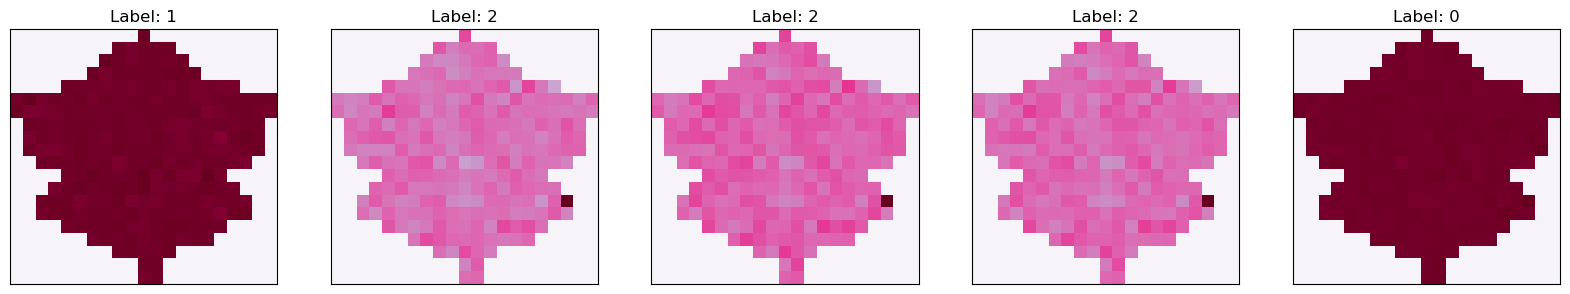

In [16]:
#Plot the first few items in the training data
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(cross_train_data[i][0], cmap="PuRd")
    axes[i].set_title(f"Label: {train_labels[i]}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()

# Model definition and training script

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class Simple2DCNN(nn.Module):
    def __init__(self):
        super(Simple2DCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 5 * 5, 256)  # Adjusted based on your data's dimensions
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, len(task_types))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)  # Adjusted based on your data's dimensions
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [18]:
class Advanced2DCNN(nn.Module):
    def __init__(self):
        super(Advanced2DCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer with 50% drop rate
        self.fc1 = nn.Linear(128 * 20 * 21, 256)  # Adjusted based on your data's dimensions
        self.dropout2 = nn.Dropout(0.5)  # Another dropout layer
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, len(task_types))

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.conv1(x)))
        x = F.leaky_relu(self.bn2(self.conv2(x)))
        x = F.leaky_relu(self.bn3(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [19]:
# Define the model
model = Advanced2DCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=6e-5, weight_decay=1e-5)  # Start with a learning rate of 1e-5

# Move the model to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Inspect the model
print(model)

Advanced2DCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=53760, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)


# Training

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_validate(model, train_dataloader, val_dataloader, epochs=10):

    train_loss, val_loss = [], []
    train_acc, val_acc = [], []
    train_prec, val_prec = [], []
    train_recall, val_recall = [], []
    train_f1, val_f1 = [], []

    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        train_preds, train_true = [], []

        model.train()  # Set the model to training mode
        for i, batch in enumerate(train_dataloader):
            # Get the inputs; data is a list of [inputs, labels]
            inputs, labels = batch
            inputs = inputs.to(device)
            labels = labels.long().to(device)  # Convert labels to Long

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs.float())
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Store predictions and true labels for metrics calculation
            train_preds.extend(predicted.cpu().numpy())
            train_true.extend(labels.cpu().numpy())

            # Print statistics
            running_loss += loss.item()
            if i % 100 == 99:    # Print every 100 mini-batches
                print(f"Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 100:.3f}")
                running_loss = 0.0
        #scheduler.step()  # Call the learning rate scheduler after each epoch
        # Calculate and print metrics for the training set
        print(f"Train Accuracy: {accuracy_score(train_true, train_preds):.2f}")
        print(f"Train Precision: {precision_score(train_true, train_preds, average='weighted'):.2f}")
        print(f"Train Recall: {recall_score(train_true, train_preds, average='weighted'):.2f}")
        print(f"Train F1 Score: {f1_score(train_true, train_preds, average='weighted'):.2f}")

        train_loss.append(running_loss / len(train_dataloader))
        train_acc.append(accuracy_score(train_true, train_preds))
        train_prec.append(precision_score(train_true, train_preds, average='weighted'))
        train_recall.append(recall_score(train_true, train_preds, average='weighted'))
        train_f1.append(f1_score(train_true, train_preds, average='weighted'))

        # Validation after each epoch
        model.eval()  # Set the model to evaluation mode
        running_val_loss = 0.0
        val_preds, val_true = [], []
        with torch.no_grad():
            for batch in val_dataloader:
                inputs, labels = batch
                inputs = inputs.to(device)
                labels = labels.long().to(device)
                outputs = model(inputs.float())
                _, predicted = torch.max(outputs.data, 1)

                # Store predictions and true labels for metrics calculation
                val_preds.extend(predicted.cpu().numpy())
                val_true.extend(labels.cpu().numpy())

                running_val_loss += criterion(outputs, labels).item()

        # Calculate and print metrics for the validation set
        print(f"Validation Accuracy: {accuracy_score(val_true, val_preds):.2f}")
        print(f"Validation Precision: {precision_score(val_true, val_preds, average='weighted'):.2f}")
        print(f"Validation Recall: {recall_score(val_true, val_preds, average='weighted'):.2f}")
        print(f"Validation F1 Score: {f1_score(val_true, val_preds, average='weighted'):.2f}")

        val_loss.append(running_val_loss / len(val_dataloader))
        val_acc.append(accuracy_score(val_true, val_preds))
        val_prec.append(precision_score(val_true, val_preds, average='weighted'))
        val_recall.append(recall_score(val_true, val_preds, average='weighted'))
        val_f1.append(f1_score(val_true, val_preds, average='weighted'))


    # Return the model 
    return model, train_loss, val_loss, train_acc, val_acc, train_prec, val_prec, train_recall, val_recall, train_f1, val_f1


In [33]:
# Define the model
intr_model = Simple2DCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(intr_model.parameters(), lr=6e-5, weight_decay=1e-5)  # Start with a learning rate of 1e-5

# Move the model to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
intr_model.to(device)

# Inspect the model
print(intr_model)

# Train and validate the models (Intra and Cross)
intra_model, intra_train_loss, intra_val_loss, intra_train_acc, intra_val_acc, intra_train_prec, intra_val_prec, intra_train_recall, intra_val_recall, intra_train_f1, intra_val_f1 = train_and_validate(intr_model, train_dataloader, val_dataloader, epochs=5)

Simple2DCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1600, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)
Epoch: 1, Batch: 100, Loss: 1.346
Epoch: 1, Batch: 200, Loss: 1.067
Epoch: 1, Batch: 300, Loss: 0.855
Train Accuracy: 0.48
Train Precision: 0.51
Train Recall: 0.48
Train F1 Score: 0.49
Validation Accuracy: 0.74
Validation Precision: 0.84
Validation Recall: 0.74
Validation F1 Score: 0.68
Epoch: 2, Batch: 100, Loss: 0.745
Epoch: 2, Batch: 200, Loss: 0.667
Epoch: 2, Batch: 300, Loss: 0.573
Train Accuracy: 0.72
Train Precision: 0.71
Train Recall: 0.72
Train F1 Score: 0.71
V

In [66]:
# Define the model
crs_model = Advanced2DCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(crs_model.parameters(), lr=1e-6, weight_decay=1e-4)  # Start with a learning rate of 1e-5

# Move the model to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
crs_model.to(device)

# Inspect the model
print(crs_model)

# Train and validate the models (Cross)
cross_model, cross_train_loss, cross_val_loss, cross_train_acc, cross_val_acc, cross_train_prec, cross_val_prec, cross_train_recall, cross_val_recall, cross_train_f1, cross_val_f1 = train_and_validate(crs_model, cross_train_dataloader, cross_val_dataloader, epochs=5)

Advanced2DCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=53760, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)
Epoch: 1, Batch: 100, Loss: 1.199
Epoch: 1, Batch: 200, Loss: 0.971
Epoch: 1, Batch: 300, Loss: 0.864
Epoch: 1, Batch: 400, Loss: 0.815
Epoch: 1, Batch: 500, Loss: 0.786
Epoch: 1, Batch: 600, Loss: 0.753
Epoch:

In [41]:
#torch.save(intra_model.state_dict(), './intra_model.pth')
torch.save(cross_model.state_dict(), './cross_model_batch256_lre6_wde4e6.pth')

C:\Users\BorisPC\AppData\Local\Temp\ipykernel_26840\4157019316.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


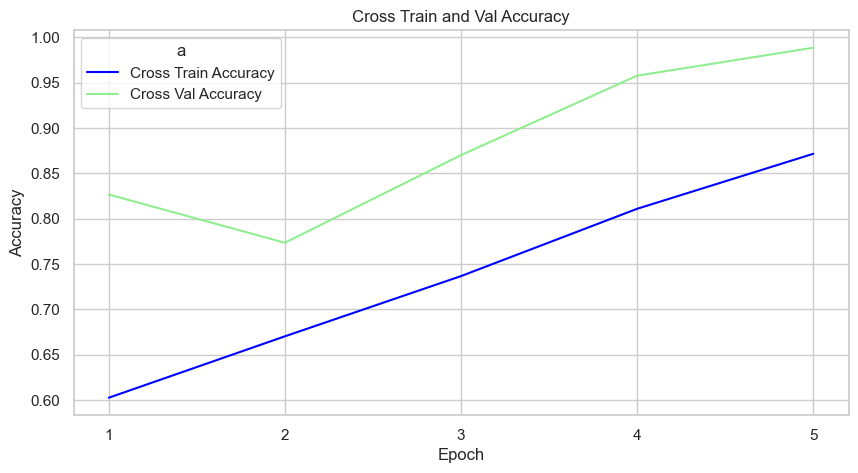

In [77]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Create a dataframe for the accuracy
accuracy_data = pd.DataFrame({
    'Epoch': range(len(cross_train_acc)),
    'Cross Train Accuracy': cross_train_acc,
    'Cross Val Accuracy': cross_val_acc,
})

# Set the style of the plots
sns.set(style="whitegrid")

# Define the color palette
palette = {
    'Cross Train Accuracy': 'blue',
    'Cross Val Accuracy': 'lightgreen',
}

# Create the accuracy plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=accuracy_data.melt('Epoch', var_name='a', value_name='Accuracy'), x="Epoch", y="Accuracy", hue='a', palette=palette)
plt.title('Cross Train and Val Accuracy')

# Set x-axis ticks to integer values
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Adjust x-ticks labels to start from 1
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [str(int(label.replace('−', '-')) + 1) for label in labels]
ax.set_xticklabels(labels)

plt.show()

# Testing

Cross Mesh Results:
Test Accuracy: 0.81
Test Precision: 0.84
Test Recall: 0.81
Test F1 Score: 0.81
Per-class Accuracy:
Class rest: 1.00
Class task_motor: 0.81
Class task_story_math: 0.87
Class task_working_memory: 0.58


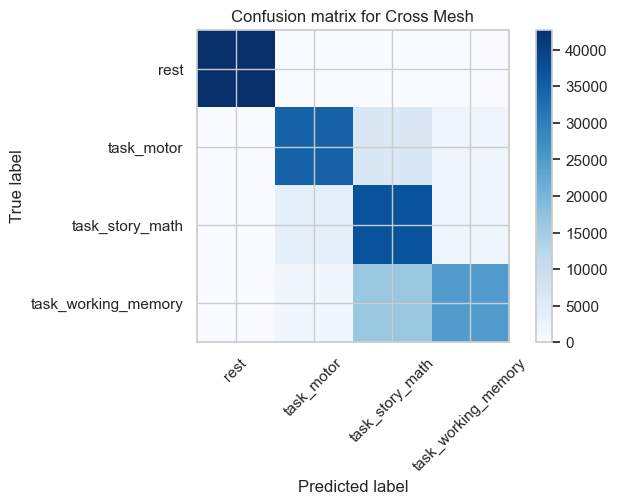

In [80]:
from sklearn.metrics import confusion_matrix

task_types = ['rest', 'task_motor', 'task_story_math', 'task_working_memory']

cross_model = Advanced2DCNN()
state_dict = torch.load('./cross_model_batch256_lre6_wde4e5.pth')
cross_model.load_state_dict(state_dict)

print("Cross Mesh Results:")
cross_model.eval()  # Set the model to evaluation mode
test_preds, test_true = [], []
with torch.no_grad():
    for batch in cross_test_dataloader:
        inputs, labels, _ = batch
        inputs = inputs.to(device)
        labels = labels.long().to(device)
        outputs = cross_model(inputs.float())
        _, predicted = torch.max(outputs.data, 1)

        # Store predictions and true labels for metrics calculation
        test_preds.extend(predicted.cpu().numpy())
        test_true.extend(labels.cpu().numpy())

# Calculate and print metrics for the cross mesh test set
cm = confusion_matrix(test_true, test_preds)
print(f"Test Accuracy: {accuracy_score(test_true, test_preds):.2f}")
print(f"Test Precision: {precision_score(test_true, test_preds, average='weighted'):.2f}")
print(f"Test Recall: {recall_score(test_true, test_preds, average='weighted'):.2f}")
print(f"Test F1 Score: {f1_score(test_true, test_preds, average='weighted'):.2f}")
print("Per-class Accuracy:")
for i, accuracy in enumerate(cm.diagonal()/cm.sum(axis=1)):
    print(f"Class {task_types[i]}: {accuracy:.2f}")

plt.figure(figsize=(7, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Cross Mesh')
plt.colorbar()
tick_marks = np.arange(len(task_types))
plt.xticks(tick_marks, task_types, rotation=45)
plt.yticks(tick_marks, task_types)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

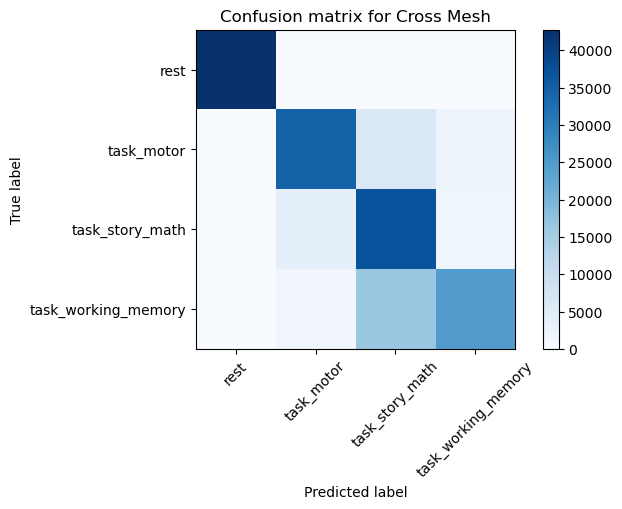

In [82]:
import matplotlib.pyplot as plt

# Reset the matplotlib parameters to their default values
plt.rcdefaults()

# Your existing code
plt.figure(figsize=(7, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Cross Mesh')
plt.colorbar()
tick_marks = np.arange(len(task_types))
plt.xticks(tick_marks, task_types, rotation=45)
plt.yticks(tick_marks, task_types)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
from collections import defaultdict
from scipy import stats

# Initialize a dictionary to store the predictions for each file
file_preds = defaultdict(list)

# Testing loop
with torch.no_grad():
    for inputs, labels, file_names in cross_test_dataloader:
        inputs = inputs.to(device)
        labels = labels.long().to(device)
        outputs = cross_model(inputs.float())
        _, predicted = torch.max(outputs.data, 1)

        # Store predictions for each file
        for file_name, pred in zip(file_names, predicted.cpu().numpy()):
            file_preds[file_name].append(pred)

# Initialize a list to store the results
results = []

# Calculate and print metrics for each file
for file_name, preds in file_preds.items():
    # Check if preds has more than one unique value
    if len(set(preds)) > 1:
        # Take the mode (most common prediction) for each file
        final_pred = stats.mode(np.array(preds)).mode[0]
    else:
        # If preds only contains one unique value, use that value as the final prediction
        final_pred = preds[0]
    true_label = task_types.index(file_name.split('_')[1])  # Extract the true label from the file name
    accuracy = accuracy_score([true_label], [final_pred])
    print(f"File: {file_name}, Accuracy: {accuracy:.2f}")

    # Save the file name, true label, and model prediction
    results.append([file_name, true_label, final_pred])

# Print the results
for result in results:
    print(result)

File: denoise_rest_162935_10_meshes.npy, Accuracy: 1.00
File: denoise_rest_162935_1_meshes.npy, Accuracy: 1.00
File: denoise_rest_162935_3_meshes.npy, Accuracy: 1.00
File: denoise_rest_162935_5_meshes.npy, Accuracy: 1.00


IndexError: invalid index to scalar variable.

In [ ]:
import os
import h5py
import numpy as np
from collections import Counter



Intra Mesh Results:
Intra Test Accuracy: 0.26
Intra Test Precision: 0.25
Intra Test Recall: 0.26
Intra Test F1 Score: 0.21
Per-class Accuracy:
Class rest: 0.68
Class task_motor: 0.02
Class task_story_math: 0.23
Class task_working_memory: 0.12


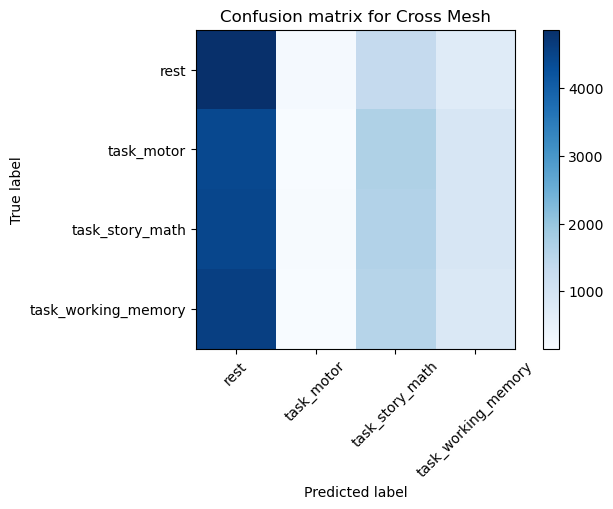

In [39]:
print("Intra Mesh Results:")
intra_model.eval()  # Set the model to evaluation mode
test_preds, test_true = [], []
with torch.no_grad():
    for batch in test_dataloader:
        inputs, labels = batch
        inputs = inputs.to(device)
        labels = labels.long().to(device)
        outputs = model(inputs.float())
        _, predicted = torch.max(outputs.data, 1)

        # Store predictions and true labels for metrics calculation
        test_preds.extend(predicted.cpu().numpy())
        test_true.extend(labels.cpu().numpy())

# Calculate and print metrics for the intra mesh test set
cm = confusion_matrix(test_true, test_preds)
print(f"Intra Test Accuracy: {accuracy_score(test_true, test_preds):.2f}")
print(f"Intra Test Precision: {precision_score(test_true, test_preds, average='weighted'):.2f}")
print(f"Intra Test Recall: {recall_score(test_true, test_preds, average='weighted'):.2f}")
print(f"Intra Test F1 Score: {f1_score(test_true, test_preds, average='weighted'):.2f}")
print("Per-class Accuracy:")
for i, accuracy in enumerate(cm.diagonal()/cm.sum(axis=1)):
    print(f"Class {task_types[i]}: {accuracy:.2f}")

plt.figure(figsize=(7, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Cross Mesh')
plt.colorbar()
tick_marks = np.arange(len(task_types))
plt.xticks(tick_marks, task_types, rotation=45)
plt.yticks(tick_marks, task_types)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Training OnevsAll classifier

In [70]:
class SimpleBinary2DCNN(nn.Module):
    def __init__(self):
        super(SimpleBinary2DCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Adjusted based on your data's dimensions
        self.fc2 = nn.Linear(128, 1)  # Output only one class

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)  # Adjusted based on your data's dimensions
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class OneVsAllClassifier():
    def __init__(self, model_class, num_classes):
        self.models = [model_class() for _ in range(num_classes)]
        self.num_classes = num_classes

    def parameters(self):
        # Return the parameters of all models
        return [param for model in self.models for param in model.parameters()]

    def fit(self, dataloader, criterion, optimizer, num_epochs=25):
        for i in range(self.num_classes):
            print(f"Training model for class {i}")
            for epoch in range(num_epochs):
                print(f"Epoch {epoch+1}/{num_epochs}")
                for inputs, labels in dataloader:
                    inputs = inputs.float().to(device)  # Convert inputs to float
                    labels = (labels == i).float().to(device)  # Convert to binary labels
                    optimizer.zero_grad()
                    outputs = self.models[i](inputs)
                    outputs = outputs.squeeze()  # Reshape the output to match the target
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

    def predict(self, inputs):
        outputs = [model(inputs) for model in self.models]
        _, preds = torch.max(torch.stack(outputs), 0)
        return preds

In [73]:
from torch import nn, optim

model = OneVsAllClassifier(SimpleBinary2DCNN, len(task_types))
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model.fit(cross_train_dataloader, criterion, optimizer, num_epochs=10)


Training model for class 0
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Training model for class 1
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Training model for class 2
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Training model for class 3
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [77]:
#check the class distribution in the test set
print(f"Number of each label in cross_test_labels: {np.bincount(cross_test_labels)}")

Number of each label in cross_test_labels: [4272 4272 4272 4272]


Test Accuracy: 0.63
Test Precision: 0.52
Test Recall: 0.63
Test F1 Score: 0.55
Per-class Accuracy:
Class rest: 1.00
Class task_motor: 0.97
Class task_story_math: 0.56
Class task_working_memory: 0.00


c:\ProgramData\anaconda3\envs\megdnn\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


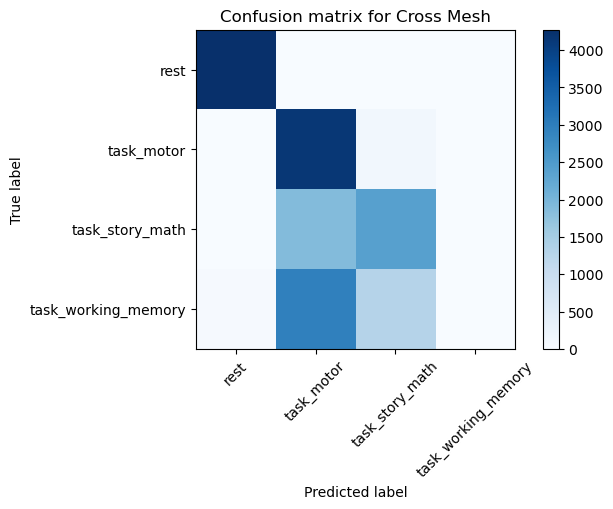

In [75]:
#model.eval()  # Set the model to evaluation mode
test_preds, test_true = [], []
with torch.no_grad():
    for batch in cross_test_dataloader:
        inputs, labels = batch
        inputs = inputs.to(device)
        labels = labels.long().to(device)
        outputs = model.predict(inputs.float())
        test_preds.extend(outputs.cpu().numpy())
        test_true.extend(labels.cpu().numpy())

# Calculate and print metrics for the cross mesh test set
cm = confusion_matrix(test_true, test_preds)
print(f"Test Accuracy: {accuracy_score(test_true, test_preds):.2f}")
print(f"Test Precision: {precision_score(test_true, test_preds, average='weighted'):.2f}")
print(f"Test Recall: {recall_score(test_true, test_preds, average='weighted'):.2f}")
print(f"Test F1 Score: {f1_score(test_true, test_preds, average='weighted'):.2f}")
print("Per-class Accuracy:")
for i, accuracy in enumerate(cm.diagonal()/cm.sum(axis=1)):
    print(f"Class {task_types[i]}: {accuracy:.2f}")

plt.figure(figsize=(7, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Cross Mesh')
plt.colorbar()
tick_marks = np.arange(len(task_types))
plt.xticks(tick_marks, task_types, rotation=45)
plt.yticks(tick_marks, task_types)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
